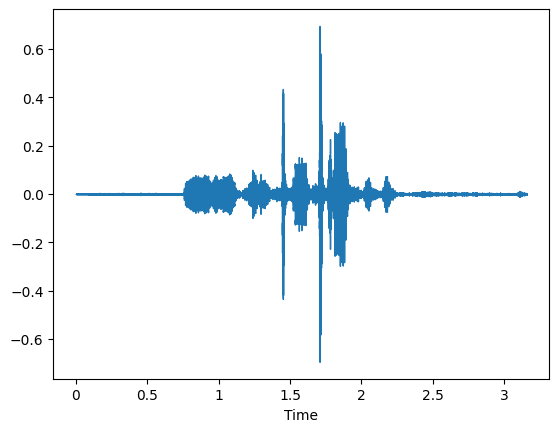

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

In [ ]:
import librosa
import soundfile as sf

audio_file = "/content/Lab1_voice.wav"
y, sr = librosa.load(audio_file)

# Trimming the audio by removing silence from the beginning and end
y_trimmed, _ = librosa.effects.trim(y)

# Save the trimmed audio
trimmed_audio_file = "trimmed_audio.wav"
sf.write(trimmed_audio_file, y_trimmed, sr)

# Original and trimmed audio for perpectual comparison
import IPython.display as ipd

print("Original audio:")
ipd.display(ipd.Audio(audio_file))

print("Trimmed audio:")
ipd.display(ipd.Audio(trimmed_audio_file))


Original audio:


Trimmed audio:


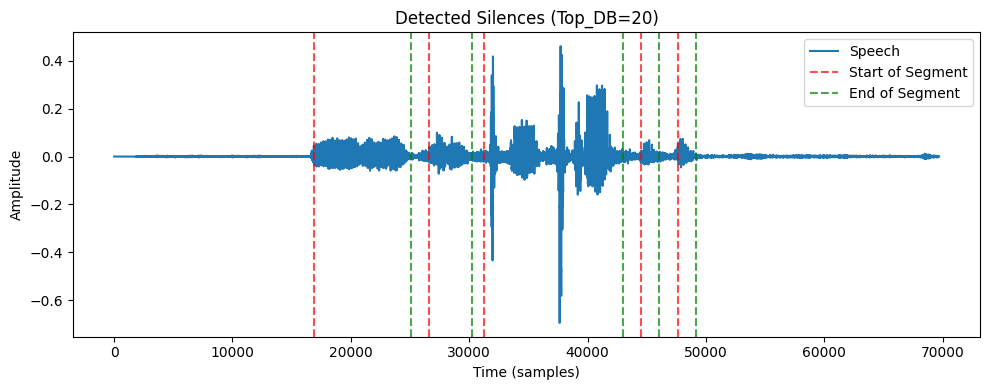

Segment 0: Duration 0.37 seconds


Segment 1: Duration 0.16 seconds


Segment 2: Duration 0.53 seconds


Segment 3: Duration 0.07 seconds


Segment 4: Duration 0.07 seconds


In [10]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

# Load the audio file
audio_file = "/content/Lab1_voice.wav"
y, sr = librosa.load(audio_file)

# Split the audio based on detected silences
split_intervals = librosa.effects.split(y, top_db=20)  # Vary top_db as needed

# Plot the split intervals
plt.figure(figsize=(10, 4))
plt.plot(y, label='Speech')
for interval in split_intervals:
    plt.axvline(x=interval[0], color='r', linestyle='--', alpha=0.7)
    plt.axvline(x=interval[1], color='g', linestyle='--', alpha=0.7)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Detected Silences (Top_DB=20)')
plt.legend(['Speech', 'Start of Segment', 'End of Segment'])
plt.tight_layout()
plt.show()

# Listen to the split segments
for i, interval in enumerate(split_intervals):
    segment = y[interval[0]:interval[1]]
    sf.write(f"segment_{i}.wav", segment, sr)
    print(f"Segment {i}: Duration {len(segment)/sr:.2f} seconds")
    # Listen to the segment
    ipd.display(ipd.Audio(f"segment_{i}.wav"))



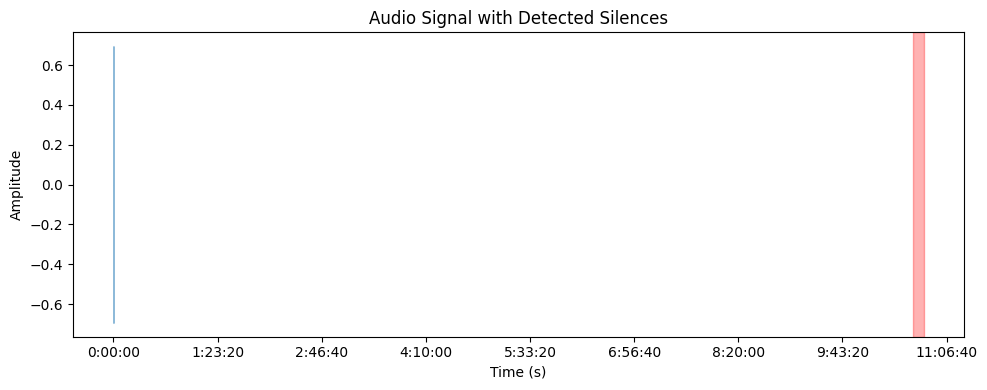

Detected silent intervals:
Interval 1: Start Time 1.74s, End Time 1.76s


In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_file = "/content/Lab1_voice.wav"
y, sr = librosa.load(audio_file)

# Calculate the short-time energy of the signal
frame_length = 1024
hop_length = 512
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

# Define a threshold for silence detection
threshold = np.mean(energy) * 0.5

# Detect silent intervals
silent_intervals = librosa.effects.split(y, top_db=threshold)

# Plot the waveform and highlight silent intervals
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
for interval in silent_intervals:
    plt.axvspan(interval[0], interval[1], color='red', alpha=0.3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal with Detected Silences')
plt.tight_layout()
plt.show()

# Print the detected silent intervals
print("Detected silent intervals:")
for i, interval in enumerate(silent_intervals):
    print(f"Interval {i + 1}: Start Time {interval[0]/sr:.2f}s, End Time {interval[1]/sr:.2f}s")


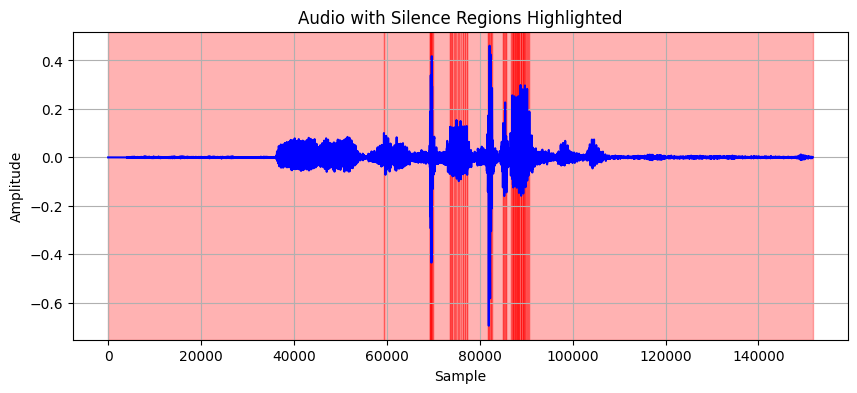

In [12]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "/content/Lab1_voice.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Plot the waveform with silence regions highlighted
plt.figure(figsize=(10, 4))
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()